### https://github.com/MicrosoftDocs/ml-basics/blob/master/05a%20-%20Deep%20Neural%20Networks%20(TensorFlow).ipynb

In [126]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

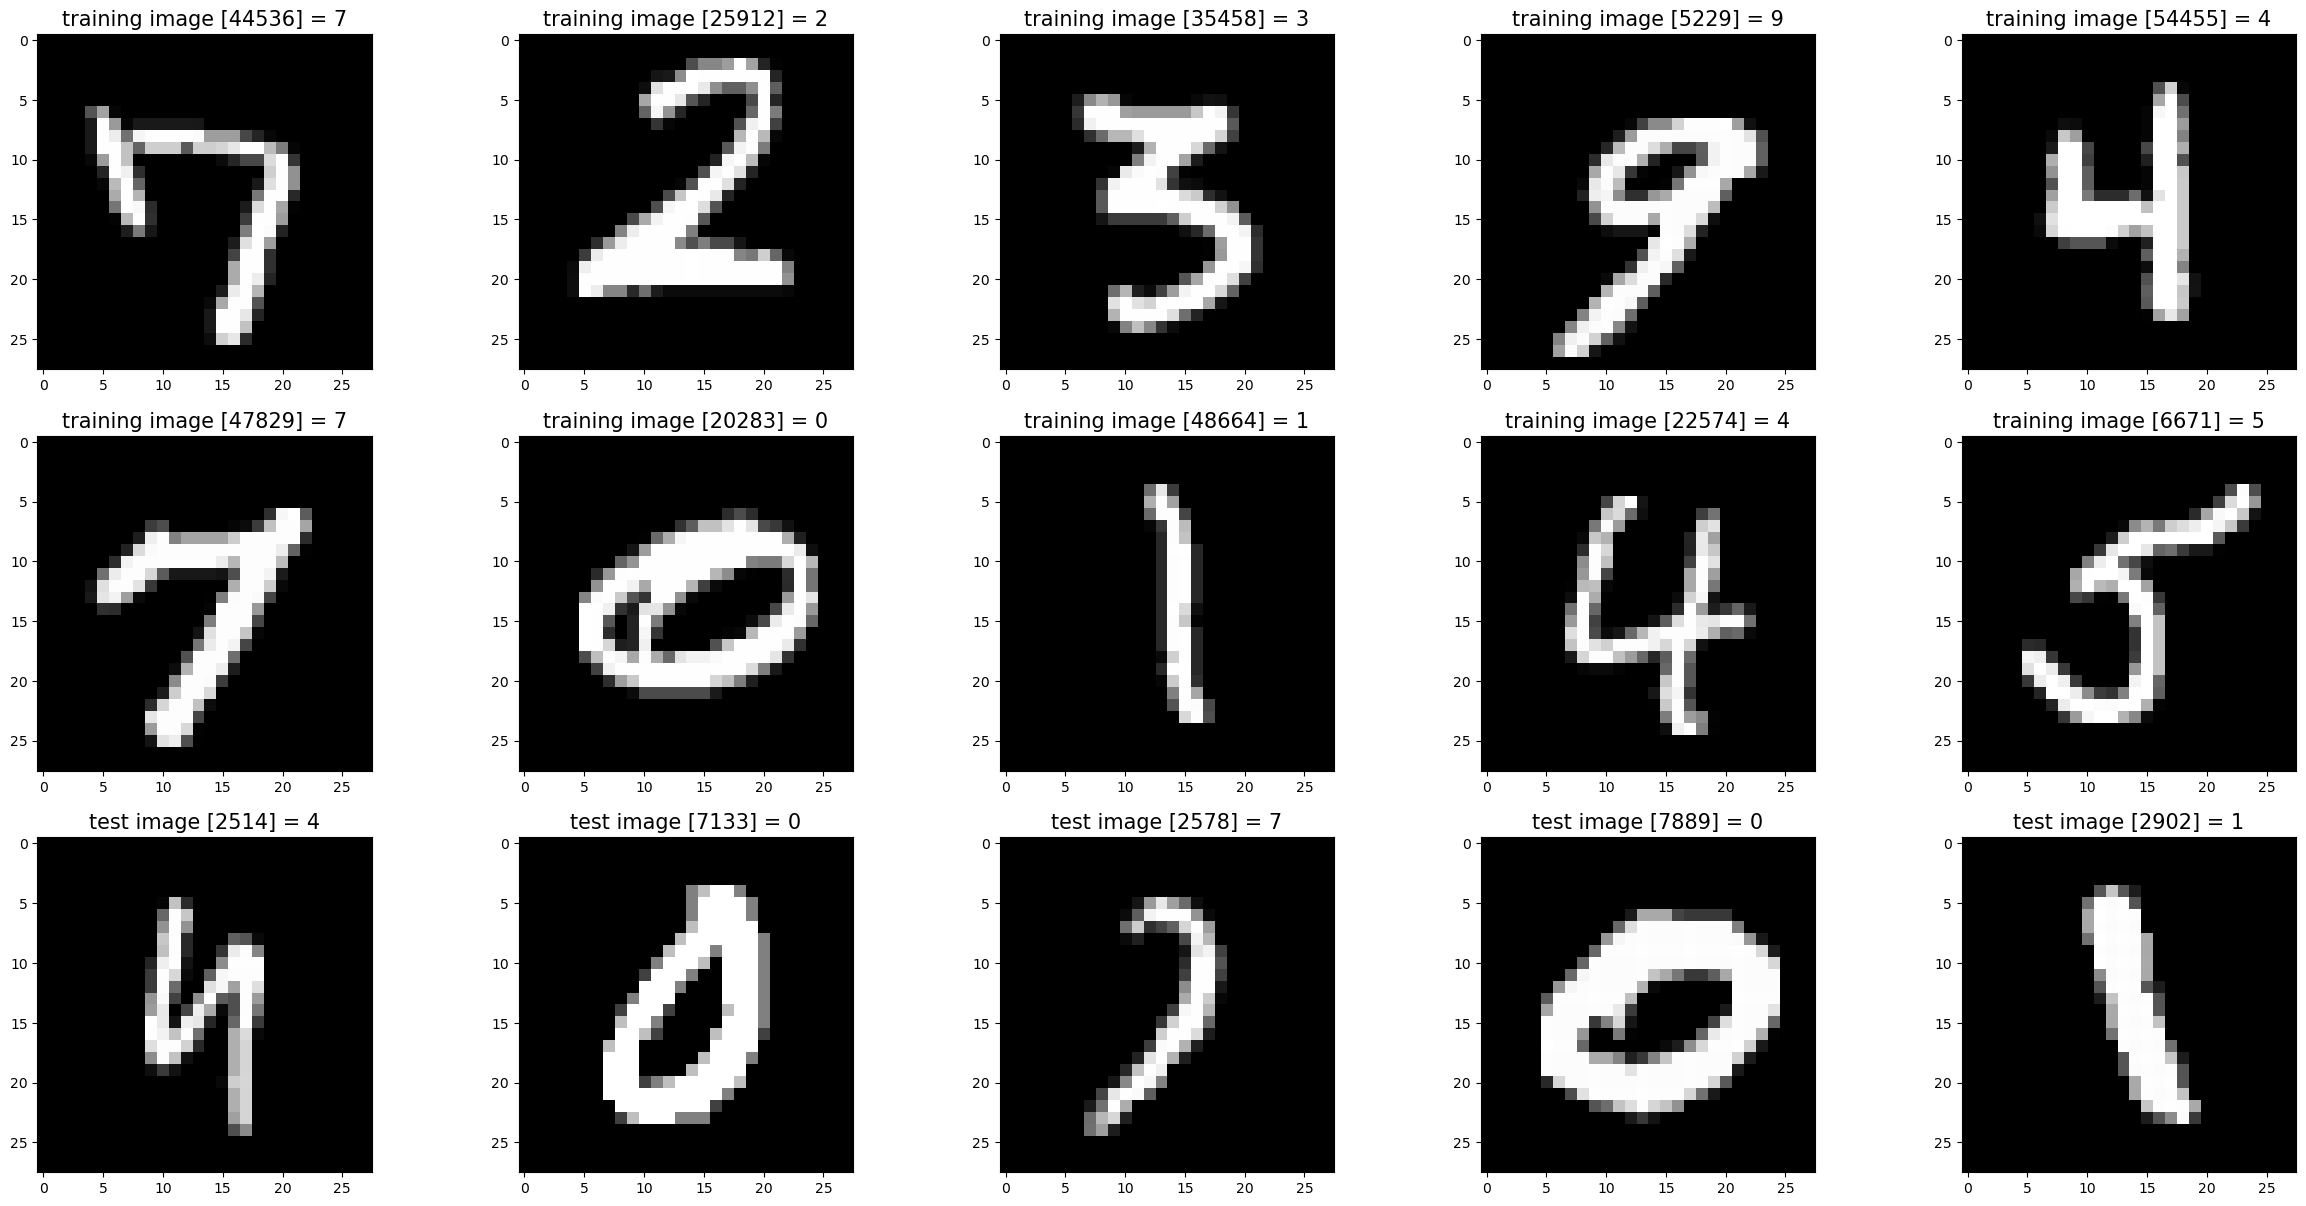

In [127]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data/'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [128]:
print("Train Images:{0}".format(len(x_train)))
print("Train Labels:{0}".format(len(y_train)))

print("Test Images:{0}".format(len(x_test)))
print("Test Labels:{0}".format(len(y_test)))

Train Images:60000
Train Labels:60000
Test Images:10000
Test Labels:10000


In [129]:
# Flatten the array
x_train_flat = np.array(x_train).reshape(len(x_train), 28*28 ) 
x_train_flat = x_train_flat.astype('float32') / 255

x_test_flat = np.array(x_test).reshape(len(x_test), 28*28 ) 
x_test_flat = x_test_flat.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [130]:
#x_train_flat.shape
y_train[0][0]

0.0

# Train

In [137]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
nodes = 4 #32 *2*2*2*2

# Define the model as a sequence of layers
model = Sequential()

#=========================================== 1 ===================================================
# model.add(Dense(nodes, input_shape=(28 * 28,), activation='relu'))
# #model.add(Dense(nodes, input_shape=(28 * 28,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# #model.add(Dropout(0.2))

# model.add(Dense(nodes, activation='relu'))
# #model.add(Dense(nodes, input_dim=nodes/2, activation='relu'))
# #model.add(Dense(nodes, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# #model.add(Dropout(0.2))

# #model.add(Dense(nodes, activation='relu'))
# #model.add(Dense(nodes, input_dim=nodes/4, activation='relu'))
# #model.add(Dense(nodes, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# #model.add(Dropout(0.2))

#=========================================== 2 ===================================================
model.add(Dense(64, input_shape=(28 * 28,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, input_shape=(28 * 28,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 64)                50240     
                                                                 
 dense_165 (Dense)           (None, 64)                4160      
                                                                 
 dense_166 (Dense)           (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Evaluate Model

In [138]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 40
history = model.fit(x_train_flat, y_train, epochs=num_epochs, batch_size=64, validation_data=(x_test_flat, y_test),
          callbacks=early_stopping)

Epoch 1/40
938/938 [==============================] - 156s 122ms/step - loss: 0.4609 - accuracy: 0.9069 - val_loss: 0.3031 - val_accuracy: 0.9425
Epoch 2/40
938/938 [==============================] - 52s 56ms/step - loss: 0.2807 - accuracy: 0.9502 - val_loss: 0.2714 - val_accuracy: 0.9488
Epoch 3/40
933/938 [============================>.] - ETA: 0s - loss: 0.2333 - accuracy: 0.9596

# Review training and validation loss

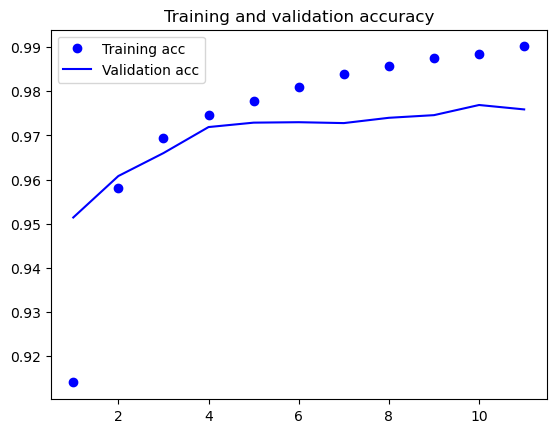

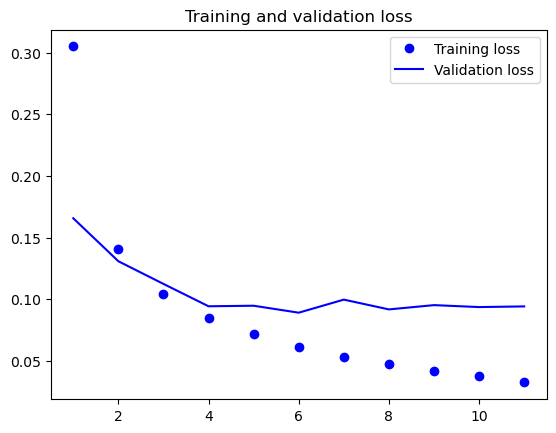

In [136]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate model performance

313/313 [==============================] - 5s 2ms/step


TypeError: arange() requires stop to be specified.

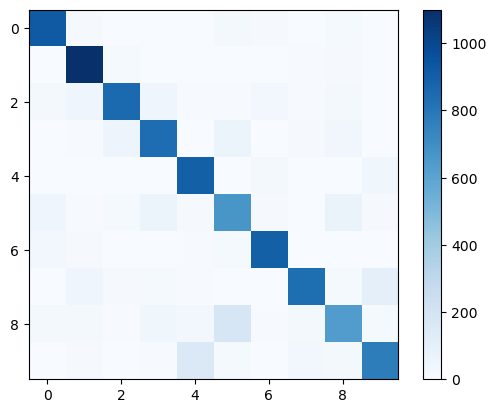

In [121]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test_flat)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange()
plt.xticks(tick_marks, true_labels, rotation=85)
plt.yticks(tick_marks, true_labels)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

# Save the trained model

In [ ]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

# Use the trained model

# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])